# COVID-19 Analysis in Indonesia

This notebook explores the spread and impact of COVID-19 across Indonesian provinc.
  
We'll clean the data, analyze trends, compare locations, and look for key patte,  — including peaks, fatality rates, and possible explanations.


## 1. Import Libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick


## 2. Data Loading and Overview

Load the dataset

In [77]:
# Load CSV file into a DataFrame
data= pd.read_csv("covid_19_indonesia_time_series_all.csv")

In [78]:
# Print the number of rows and columns
print(f"The dataset contains of {data.shape[0]} rows and {data.shape[1]} columns")

The dataset contains of 31822 rows and 38 columns


In [79]:
pd.set_option("display.max_columns", None) 

In [80]:
# Show basic statistics for numerical columns (mean, min, max, etc)
data.describe() 

# - The 'City/Regency' column appears to be entirely missing (all values are NaN)
# - This column can likely be dropped from the analysis
# - Some missing values are found in:
#     - 'Total Cities'
#     - 'Total Urban Villages'
#     - 'Total Rural Villages'
#     - 'Growth Factor of New Cases'
#     - 'Growth Factor of New Deaths'

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,30921.000000,31822.000000,30918.000000,30893.000000,3.182200e+04,3.182200e+04,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,5.835840,417.952297,505.513940,4462.492798,1.106532e+05,1.536766e+07,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,16.390123,1192.995149,1422.070929,12582.736429,3.187865e+05,4.461714e+07,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,1.000000,44.000000,35.000000,275.000000,6.640000e+02,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,1.000000,103.000000,99.000000,928.000000,1.678700e+04,1.999539e+06,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,2.000000,169.000000,175.000000,1591.000000,4.201300e+04,4.216171e+06,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,4.000000,289.000000,332.000000,2853.000000,7.546800e+04,9.095591e+06,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,98.000000,7230.000000,8488.000000,74953.000000,1.916907e+06,2.651855e+08,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


In [81]:
# Display the names and types of each column, and count of non-null values
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

## 3. Data Cleaning
We load the dataset and prepare it by:
- Converting date columns
- Cleaning string fields
- Handling missing values in location-specific columns


In [83]:
data = data.drop_duplicates()

In [84]:
#Ensure it's string type and remove whitespace
data['Location'] = data['Location'].apply(str).str.strip()

In [85]:
# Convert date column into date format
data['Date'] =pd.to_datetime(data['Date']) 

#### Handle missing values

In [87]:
# If:
#   - 'Province' is missing (NaN)
#   - AND 'Location Level' is "Country"
# Then:
#   - Fill 'Province', 'Island', and 'Time Zone' with "Unknown".
#
# Reason:
#   When 'Location Level' = "Country" (ex : "Indonesia"),
#   there is no specific province, island, or time zone recorded.
#   Since these details are not available at the country level,
#   we set them explicitly to "Unknown".

data.loc[(data['Province'].isna()) & (data['Location Level']=='Country'), ['Province','Island', 'Time Zone']]= ['Unknown','Unknown','Unknown'] 


In [88]:
# Filter only rows where 'Special Status' is NOT null
# Group the filtered data by both 'Special Status' and 'Province'
# Then sum the 'Total Cases' for each group
data[data['Special Status'].notna()].groupby(['Special Status','Province'])['Total Cases'].sum()

Special Status          Province                  
Daerah Istimewa         Daerah Istimewa Yogyakarta     86090207
Daerah Khusus           Aceh                           19962180
                        Papua                          22285548
                        Papua Barat                    13634548
Daerah Khusus Ibu Kota  DKI Jakarta                   545806047
Name: Total Cases, dtype: int64

In [89]:
# 'Special Status' marks provinces with special autonomy (Aceh, Papua, Papua Barat, DI Yogyakarta, Jakarta)
# Provinces without a special status will have NaN in this column
# All other provinces that shouldn't have a special status still get a consistent "Unknown" entry instead of NaN
data.loc[(data['Special Status'].isna()) & (~data['Province'].isin(['Daerah Istimewa Yogyakarta','Aceh','Papua','Papua Barat', 'DKI Jakarta'])), 'Special Status']= 'Unknown'

In [90]:
# We filter rows where "Total Cities" is NaN.
# Then group by ['Location','Province','Total Regencies'] just to inspect patterns.
# The only case with missing cities is Sulawesi Barat.
# That suggests it’s not really missing data, but zero cities exist there.
data[data['Total Cities'].isna()].groupby(['Location','Province','Total Regencies']).nunique()

,,,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Country,Continent,Island,Time Zone,Special Status,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
Location,Province,Total Regencies,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sulawesi Barat,Sulawesi Barat,6,901,1,118,10,117,151,618,196,600,409,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,118,618,10,196,196,153,545,200,22


In [91]:
data.loc[data['Province']=='Sulawesi Barat', 'Total Cities'].unique() 
#there's non of Sulawesi Barat Province that has non-Na's values on 'Total Cities' column

array([nan])

In [92]:
# For Sulawesi Barat (West Sulawesi), there are no cities in the dataset.
# I have also confirmed in real life that this province indeed has 0 cities.
# Replace missing values in 'Total Cities' for this province with 0.
data.loc[data['Province']=='Sulawesi Barat', 'Total Cities' ]=0

In [93]:
def check_unique_null (x):
    print(data.loc[data[x].isna(), 'Province'].unique())

In [94]:
column_check = ['Total Rural Villages','Total Urban Villages']
for x in column_check:
    print(x)
    check_unique_null(x)
    print('\n')

# Only Aceh has NaN in 'Total Urban Villages' — confirmed in real life, Aceh has 0 urban villages.
# Only DKI Jakarta has NaN in 'Total Rural Villages' — confirmed in real life, Jakarta has 0 rural villages.

Total Rural Villages
['DKI Jakarta']


Total Urban Villages
['Aceh']




In [95]:
data.loc[(data['Total Rural Villages'].isna()) & (data['Location']== 'DKI Jakarta'), ['Total Rural Villages']]= 0 
data.loc[(data['Total Urban Villages'].isna()) & (data['Location']== 'Aceh'), ['Total Urban Villages']]= 0 

We realize that the formula to count  Growth Factor of New Cases is based on 
Today New Cases / Yesterday New Cases 

Note : it must be ordered based on location, date

for 
- Today New Cases =0 and Yesterday New Cases = 0, the growth = 1.00 , which indicates no changes
- Today New Cases = 0 and Yesterday New Cases >0 , the growth =0
- Today New Cases >0 and Yesterday New Cases= 0 => Creates NaN
  even if we fill in, the growth will be unexpectedly high number, so we will non fill that

  

In [97]:
data[(data['Growth Factor of New Cases'].notna()) & (data['Location'] == 'Kalimantan Barat')].sort_values(by=['Date']).tail(15)
#Examples to proof the calculation above

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31275,2022-08-31,ID-KB,Kalimantan Barat,12,0,0,12,65457,1132,64225,100,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,2.21,12070.67,0.0,208.75,20.87,1.73%,98.12%,0.71,1.0
31310,2022-09-01,ID-KB,Kalimantan Barat,19,0,0,19,65476,1132,64225,119,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,3.50,12074.17,0.0,208.75,20.87,1.73%,98.09%,1.58,1.0
31345,2022-09-02,ID-KB,Kalimantan Barat,14,0,0,14,65490,1132,64225,133,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,2.58,12076.76,0.0,208.75,20.87,1.73%,98.07%,0.74,1.0
31380,2022-09-03,ID-KB,Kalimantan Barat,2,0,0,2,65492,1132,64225,135,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,0.37,12077.12,0.0,208.75,20.87,1.73%,98.07%,0.14,1.0
31415,2022-09-04,ID-KB,Kalimantan Barat,9,0,0,9,65501,1132,64225,144,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,1.66,12078.78,0.0,208.75,20.87,1.73%,98.05%,4.50,1.0
31450,2022-09-05,ID-KB,Kalimantan Barat,9,0,0,9,65510,1132,64225,153,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,1.66,12080.44,0.0,208.75,20.87,1.73%,98.04%,1.00,1.0
31485,2022-09-06,ID-KB,Kalimantan Barat,17,0,6,11,65527,1132,64231,164,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,3.13,12083.58,0.0,208.75,20.87,1.73%,98.02%,1.89,1.0
31520,2022-09-07,ID-KB,Kalimantan Barat,18,0,48,-30,65545,1132,64279,134,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,3.32,12086.90,0.0,208.75,20.87,1.73%,98.07%,1.06,1.0
31555,2022-09-08,ID-KB,Kalimantan Barat,20,0,0,20,65565,1132,64279,154,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,3.69,12090.59,0.0,208.75,20.87,1.73%,98.04%,1.11,1.0
31590,2022-09-09,ID-KB,Kalimantan Barat,10,0,0,10,65575,1132,64279,164,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,1.84,12092.43,0.0,208.75,20.87,1.73%,98.02%,0.50,1.0


In [98]:
data['Continent'].unique()

array(['Asia'], dtype=object)

In [99]:
data['Country'].unique()

array(['Indonesia'], dtype=object)

In [100]:
# Drop unnecessary columns:
# - 'City or Regency' → all values are NaN
# - 'Country' and 'Continent' → redundant (all data is from Indonesia/Asia)
data =data.drop(['City or Regency','Continent','Country'], axis=1) 

## 3. Feature Engineering
We create new variables to help our analysis, including :
- Year
- Month

In [144]:
data['year'] = data['Date'].dt.year # create new column call year

In [146]:
data['Month']= data['Date'].dt.month # create new column call month

In [148]:
# Country-level and province-level separation
country_data = data[data['Location']== 'Indonesia']

## 4. Exploratory Data Analysis (EDA)

### 4.1 Daily New Cases in Indonesia


In [177]:
# Aggregate total new cases by Date
# It uses the country level data (Indonesia)
daily_cases = country_data.groupby(['Date'])['New Cases'].sum().reset_index()

location_cases = data.groupby(['Location','Date','Island', 'Location Level'])['New Cases'].sum().reset_index()

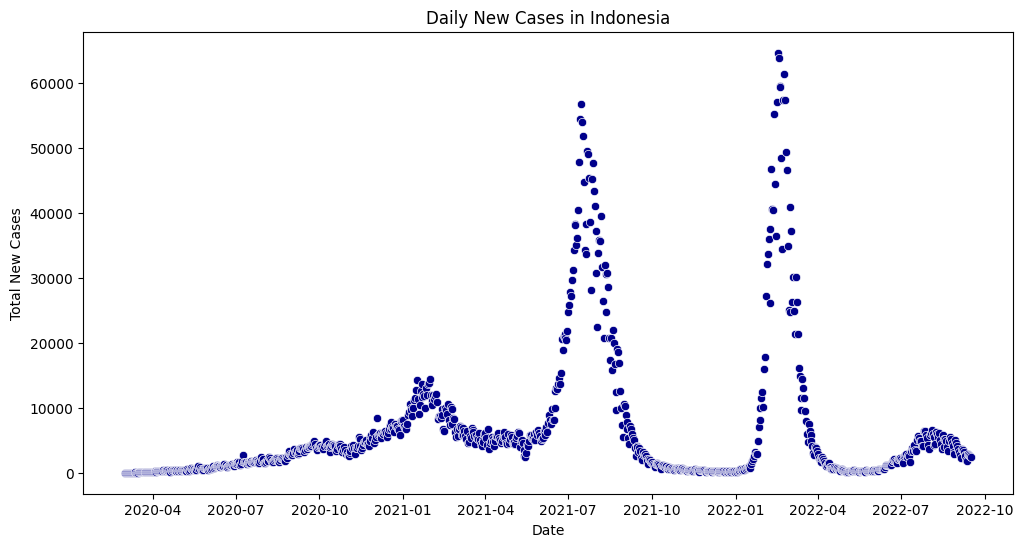

In [179]:
plt.subplots(figsize= (12,6))
sns.scatterplot(x='Date', y='New Cases', data=daily_cases, color='darkblue')
plt.title('Daily New Cases in Indonesia')
plt.xlabel('Date')
plt.ylabel('Total New Cases')
plt.show()

# New cases increased rapidly during:
# - 2021-07 to 2021-10 (1st wave)
# - 2022-01 to 2022-04 (2nd wave)

#### Peaks of First and Second Waves



COVID-19 waves in Indonesia:
- 1st wave: 2021-07 to 2021-10 → peak on 2021-07-15
- 2nd wave: 2022-01 to 2022-04 → peak on 2022-02-16


In [895]:
daily_cases.loc[daily_cases['New Cases'].idxmax()]


Location Level                Country
Date              2022-02-16 00:00:00
New Cases                       64718
Name: 716, dtype: object

In [897]:
daily_cases.loc[daily_cases[daily_cases['Date'] < '2022-01-01']['New Cases'].idxmax()]

Location Level                Country
Date              2021-07-15 00:00:00
New Cases                       56757
Name: 500, dtype: object

In [205]:
# To get precise information on which location has the highest number of new cases on the first and second waves of COVID-19
second_waves =location_cases[(location_cases['Date']== '2022-02-16') & (location_cases['Location'] != 'Indonesia')].sort_values(by='New Cases', ascending=False).head(10)
first_waves = location_cases[(location_cases['Date']== '2021-07-15')  & (location_cases['Location'] != 'Indonesia')].sort_values(by='New Cases', ascending=False).head(10).sort_values(by='New Cases', ascending=True)
second_waves_t =location_cases[(location_cases['Date']== '2022-02-16') & (location_cases['Location'] != 'Indonesia')].sort_values(by='New Cases', ascending=False).tail(10).sort_values(by='New Cases', ascending=True)
first_waves_t = location_cases[(location_cases['Date']== '2021-07-15')  & (location_cases['Location'] != 'Indonesia')].sort_values(by='New Cases', ascending=False).tail(10)

Countries with high case numbers in the first wave also tended to have high case numbers in the second wave, and the same goes for low-case countries

It seems there’s a positive relationship between first-wave and second-wave case counts

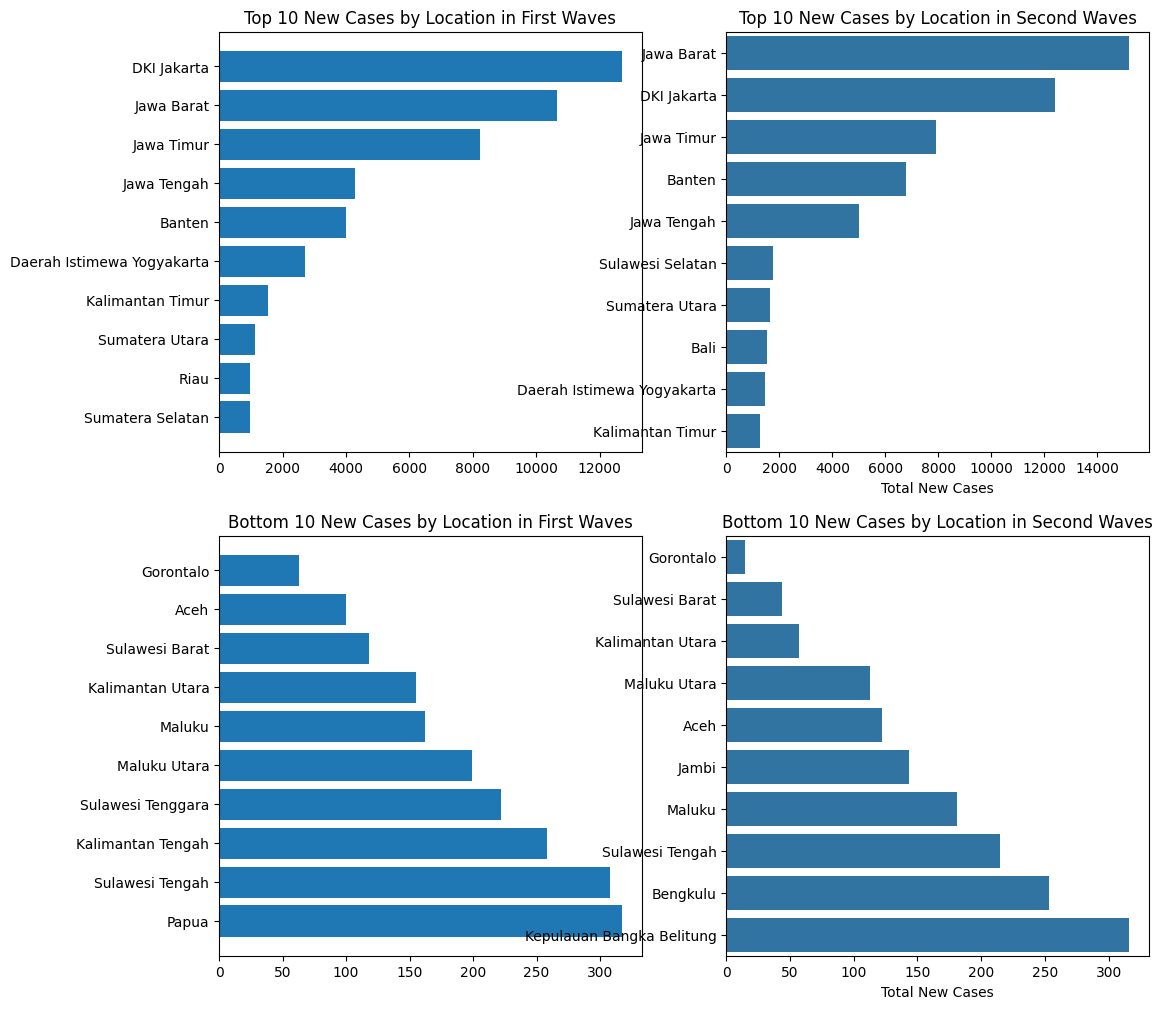

In [208]:
fig, axes= plt.subplots(2,2,figsize=(12,12))
ax= axes.flatten()
ax[0].barh(y=first_waves['Location'],width=first_waves['New Cases'])
ax[0].set_title('Top 10 New Cases by Location in First Waves')

sns.barplot(x= 'New Cases', y='Location', data=second_waves, ax= ax[1])
ax[1].set_xlabel('Total New Cases')
ax[1].set_ylabel('')
ax[1].set_title('Top 10 New Cases by Location in Second Waves')

ax[2].barh(y=first_waves_t['Location'],width=first_waves_t['New Cases'])
ax[2].set_title('Bottom 10 New Cases by Location in First Waves')

sns.barplot(x= 'New Cases', y='Location', data=second_waves_t, ax= ax[3])
ax[3].set_xlabel('Total New Cases')
ax[3].set_ylabel('')
ax[3].set_title('Bottom 10 New Cases by Location in Second Waves')

plt.show()

In [216]:
# is it they hv high new cases bcs of the high population?
data_province = data[data['Location'] != 'Indonesia'] # Filter out Indonesia rows
Population_cases=data_province.groupby(['Location', 'Population'])['New Cases'].sum().reset_index()
Population_cases['New Cases'] = Population_cases['New Cases'].astype(int)
Population_cases['Population'] = Population_cases['Population'].astype(int)

In [226]:
# Check correlation between population and total cases
# There are strong positive correlation between population and total cases.
# larger populations tend to have more cases
Population_cases['Population'].corr(Population_cases['New Cases'])

0.7110356964340189

In [218]:
# Calculate proportion of population infected
Population_cases ['Proportion'] = Population_cases['New Cases']/Population_cases['Population']
# Sort by proportion and display top 5
Population_cases.sort_values(by='Proportion', ascending=False).head(5)

# Insights:
# - Jakarta has the largest population AND the highest total cases.
# - Its infection proportion is ~13%, double that of most other regions.
# - Smaller provinces like Kalimantan Utara (only ~648k people) still have a high proportion (~7%).

,Location,Population,New Cases,Proportion
4,DKI Jakarta,10846145,1412474,0.130228
15,Kalimantan Utara,648407,45417,0.070044
5,Daerah Istimewa Yogyakarta,3631015,224307,0.061775
14,Kalimantan Timur,3552191,209017,0.058842
16,Kepulauan Bangka Belitung,1379767,66144,0.047939


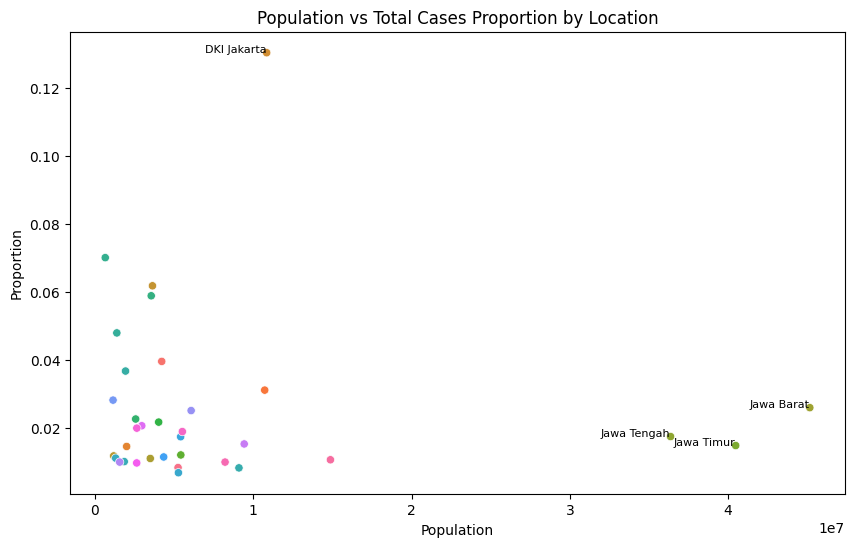

In [220]:
plt.figure(figsize= (10,6))
sns.scatterplot(data=Population_cases,x= 'Population', y='Proportion', hue= 'Location', legend=False)
plt.title('Population vs Total Cases Proportion by Location')
outlier = Population_cases[Population_cases['Location'].isin(['DKI Jakarta','Jawa Tengah', 'Jawa Timur', 'Jawa Barat'])]
for i in range(len(outlier)):
    plt.text(outlier['Population'].iloc[i],
             outlier['Proportion'].iloc[i],
             outlier['Location'].iloc[i],
             fontsize=8, ha='right')
plt.show()

# Observations:
# - DKI Jakarta stands out significantly with the highest proportion of cases despite not having the highest population.
# - Jawa Barat, Jawa Timur, and Jawa Tengah have high population values but relatively low proportions, meaning fewer cases per capita.

### 4.2 Daily New Cases by Location
This helps track daily case trends for each location

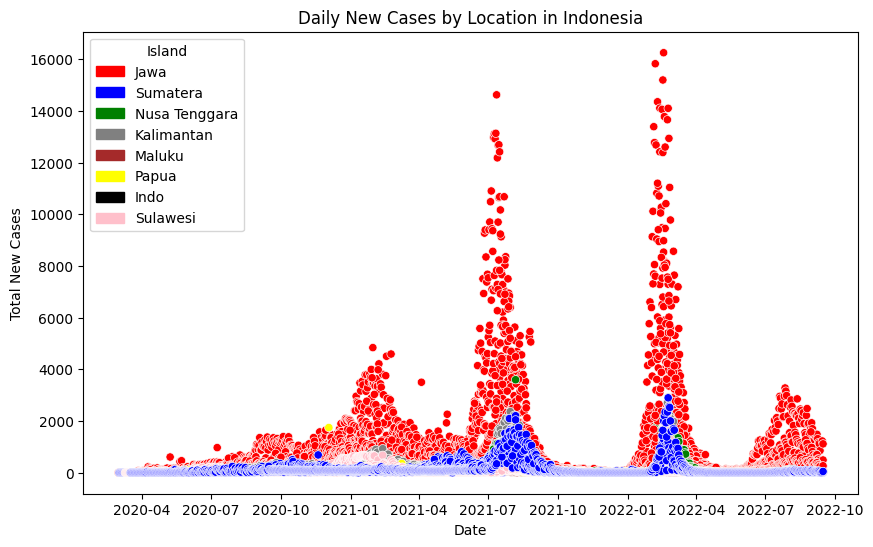

In [165]:
location_color = {'Jawa' :'red',
                  'Sumatera':'blue',
                  'Nusa Tenggara' :'green',
                  'Kalimantan':'grey',
                  'Maluku':'brown',
                  'Papua' :'yellow',
                  'Indo' :'black',
                 'Sulawesi': 'pink'}

location_cases['colorss'] = location_cases['Island'].map(location_color)

plt.subplots(figsize= (10,6))
sns.scatterplot(x= 'Date',y='New Cases', hue='Location', data=location_cases[location_cases['Location'] != 'Indonesia'], palette=dict(zip(location_cases['Location'], location_cases['colorss'])), legend=False)
legend_customise = [ mpatches.Patch(color= col, label= island) for island, col in location_color.items()]
plt.legend(handles= legend_customise, title='Island', loc ='upper left')
plt.title('Daily New Cases by Location in Indonesia')
plt.ylabel('Total New Cases')
plt.show()

# We show the sum of new cases by location and color it by island so that it's easier to viz 
# From graph below, in province level, Jawa Island seems to have higher New Cases compared to the other islands regardless of the date and the location.
# This means in Jawa island that consist of Jawa Barat, Jawa Timur, etc has higher cases compared to others.

In [941]:
# It finds the maximum daily "New Cases" for each location (province).
# Then it shows which island that province belongs to, the exact date of the spike, and the total new cases 

## From the graph above, we can see there's outlier. 
## Papua Island, peak in 2020 (yellow line on the graph)
## Nusa Tenggara, peak around 2021-08 (green line on the graph)

location_cases.loc[location_cases.groupby(['Location'])['New Cases'].idxmax(), ['Island','Location','Date','New Cases']].sort_values(by='Island')

,Island,Location,Date,New Cases
2531,Jawa,Banten,2022-02-12,7283
4353,Jawa,DKI Jakarta,2022-02-06,15825
5285,Jawa,Daerah Istimewa Yogyakarta,2022-02-24,2866
8932,Jawa,Jawa Barat,2022-02-17,16251
9650,Jawa,Jawa Tengah,2021-07-28,6638
10766,Jawa,Jawa Timur,2022-02-17,8977
11675,Kalimantan,Kalimantan Barat,2022-02-25,1018
15092,Kalimantan,Kalimantan Utara,2021-08-04,632
12365,Kalimantan,Kalimantan Selatan,2021-07-30,958
13473,Kalimantan,Kalimantan Tengah,2022-02-19,541


#### This next part is checking whether the 'Country' total is simply the sum of all its 'Province' values

- Filter the dataset to only include rows where the Date is 2022-02-16
- Then group the filtered data by 'Location Level' (e.g., Province, Country)
- Sum up the 'New Cases' for each location level on that date.

The sum of new cases in Country level is the same amount with the province level

In [905]:
location_cases[location_cases['Date'] =='2022-02-16'].groupby('Location Level')['New Cases'].sum()

Location Level
Country     64718
Province    64718
Name: New Cases, dtype: int64

In [188]:
check_=location_cases.groupby(['Date','Location Level'])['New Cases'].sum().reset_index().pivot_table(index='Date', columns= 'Location Level', values= 'New Cases').reset_index()

In [190]:
# Create a new column that checks if, for each date,
# the 'Province' total matches the 'Country' total.
check_['checking'] = check_['Province'] == check_['Country'] 

In [194]:
#Count how many dates have matching totals (True) vs mismatching (False).
check_.groupby('checking').size() 

checking
False    717
True     213
dtype: int64

#### Interpretation:
- Around 200+ dates return True => likely the country total is the sum of its provinces on those days.
- Around 700+ dates return False => could be due to timezone mismatches, reporting delays, or data quality issues where province sums don’t exactly match the country-level total.

### 4.3 Monthly Average of New Covid-19 Cases Per Location

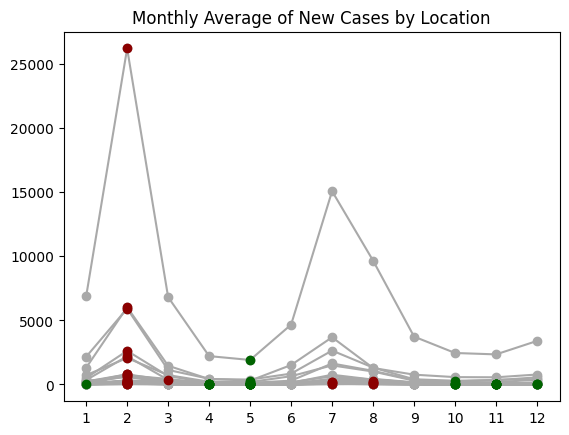

In [200]:
Monthly_newcases_by_month=data.groupby(['Location','Month'])['New Cases'].mean().reset_index()
plt.subplots(figure=(6,10))
for x in data['Location'].unique():
    areas= Monthly_newcases_by_month[Monthly_newcases_by_month['Location']==x]
    plt.plot(areas['Month'], areas['New Cases'],marker='o', color='darkgrey')
    plt.scatter(areas['Month'][areas['New Cases'].idxmax()], areas['New Cases'].max(), color='darkred', zorder=3)
    plt.scatter(areas['Month'][areas['New Cases'].idxmin()], areas['New Cases'].min(),color= 'darkgreen', zorder=3)
    plt.title('Monthly Average of New Cases by Location')
    plt.xticks(ticks=range(1,13))

# Dark grey lines = the overall month-to-month trend for each location.
# Dark red dots = the month where that location had its highest average new cases.
# Dark green dots = the month where that location had its lowest average new cases.
# Regardless the location, the highest new cases mainly happened in Feb

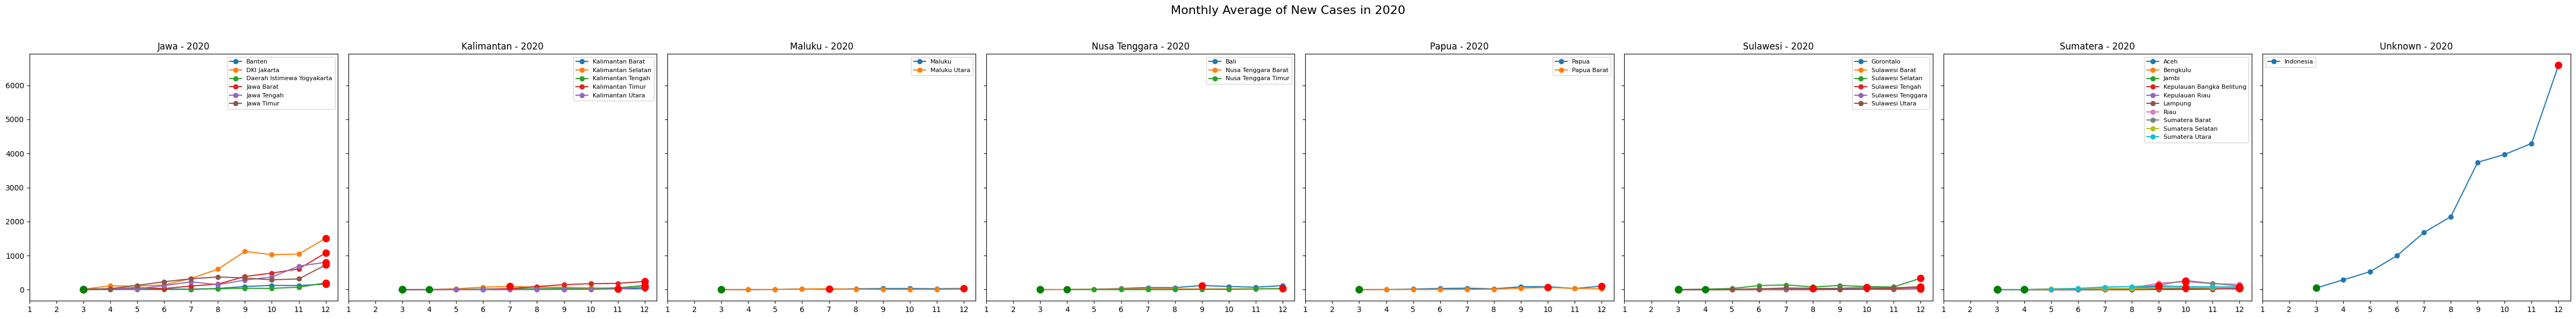

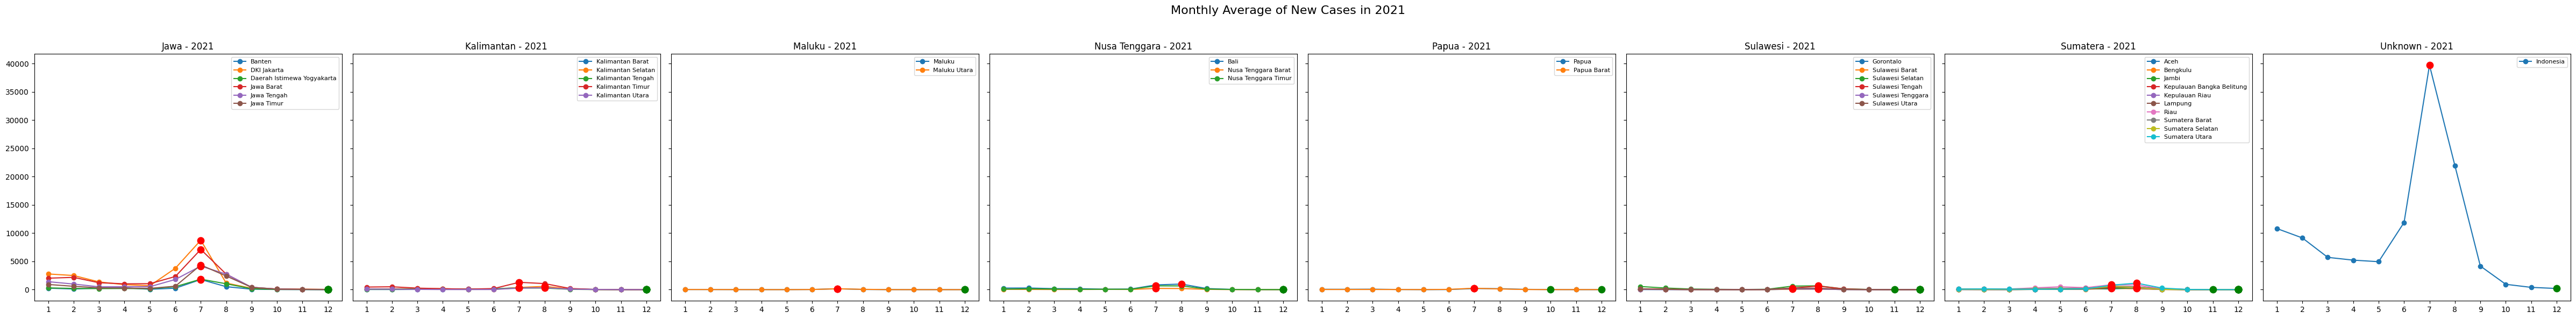

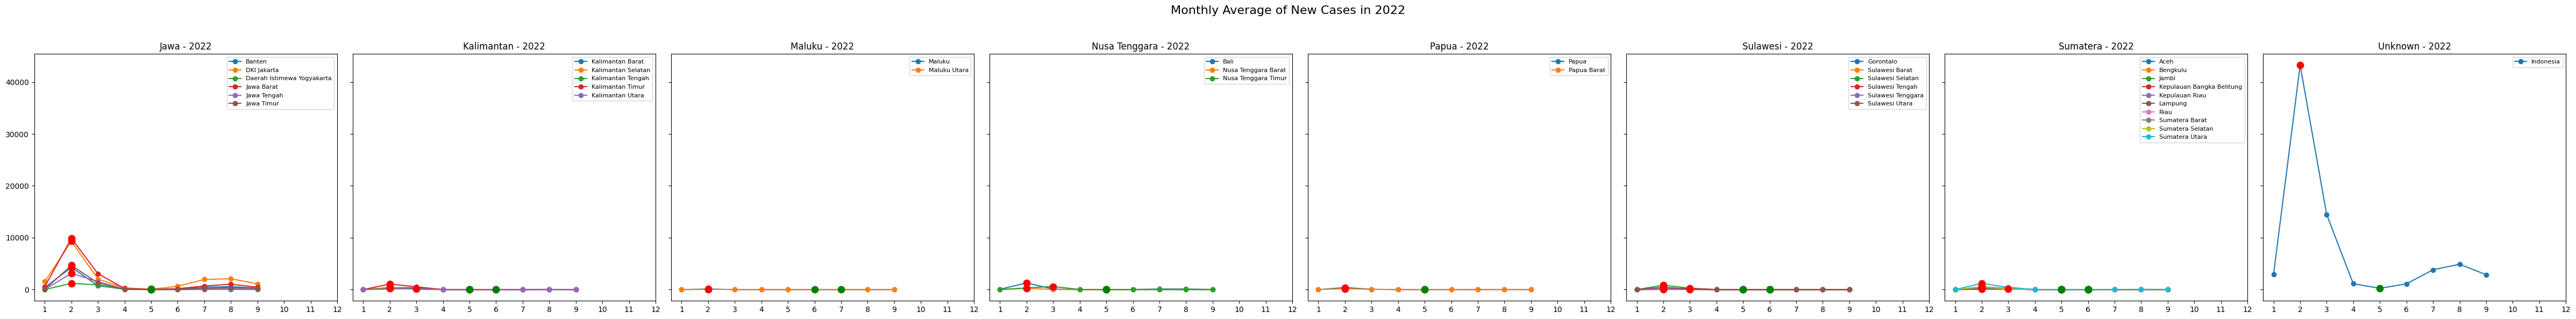

In [312]:
# Monthly Average New Covid-19 Cases by Location and Year
# Grouped data
Monthly_newcases_by_month_I = data.groupby(
    ['year','Island','Location','Month']
)['New Cases'].mean().reset_index()

# Loop over years
for year in sorted(Monthly_newcases_by_month_I['year'].unique()):
    # Filter for this year
    year_data = Monthly_newcases_by_month_I[Monthly_newcases_by_month_I['year']==year]
    islands = year_data['Island'].unique()
    
    fig, axes = plt.subplots(1, len(islands), figsize=(6*len(islands),6), sharey=True)
    if len(islands) == 1:  # when only 1 island, axes is not an array
        axes = [axes]
    
    for ax, island in zip(axes, islands):
        island_data = year_data[year_data['Island']==island]
        
        # Plot each location in the island
        for loc in island_data['Location'].unique():
            loc_data = island_data[island_data['Location']==loc]
            ax.plot(loc_data['Month'], loc_data['New Cases'], marker='o', label=loc)
            
            # highlight max/min
            ax.scatter(loc_data['Month'][loc_data['New Cases'].idxmax()],
                       loc_data['New Cases'].max(),
                       color='red', s=80, zorder=3)
            ax.scatter(loc_data['Month'][loc_data['New Cases'].idxmin()],
                       loc_data['New Cases'].min(),
                       color='green', s=80, zorder=3)
        
        ax.set_title(f"{island} - {year}")
        ax.set_xticks(range(1,13))
        ax.legend(fontsize=8)
    
    plt.suptitle(f"Monthly Average of New Cases in {year}", fontsize=16)
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()


### 4.4 Total Deaths and Total Cases Relationship

High population with low new cases can look good. It might mean effective control or fewer infections relative to population size.

But low new cases don’t always mean good, especially if deaths are high. That could mean:
- Underreporting of cases
- Severe outcomes despite fewer infections


In [246]:

# Get latest data per location excluding the overall country-level 'Indonesia'
#Keep only the last row for each location (which is now the row with the latest date). This is bcs the latest date hv the total cases which is sum of all new cases, etc
latest_data=data[data['Location']!='Indonesia'].sort_values('Date').drop_duplicates(subset='Location', keep='last')[['Location', 'Date','Total Cases' ,'Total Deaths','Total Recovered', 'Total Active Cases','Island'
]]

## Calculate death proportion (case fatality rate)
latest_data['Death Proportion'] = latest_data['Total Deaths']/latest_data['Total Cases']

### Sort by death proportion ascending for easier analysis
latest_data=latest_data.sort_values(by='Death Proportion', ascending=True)


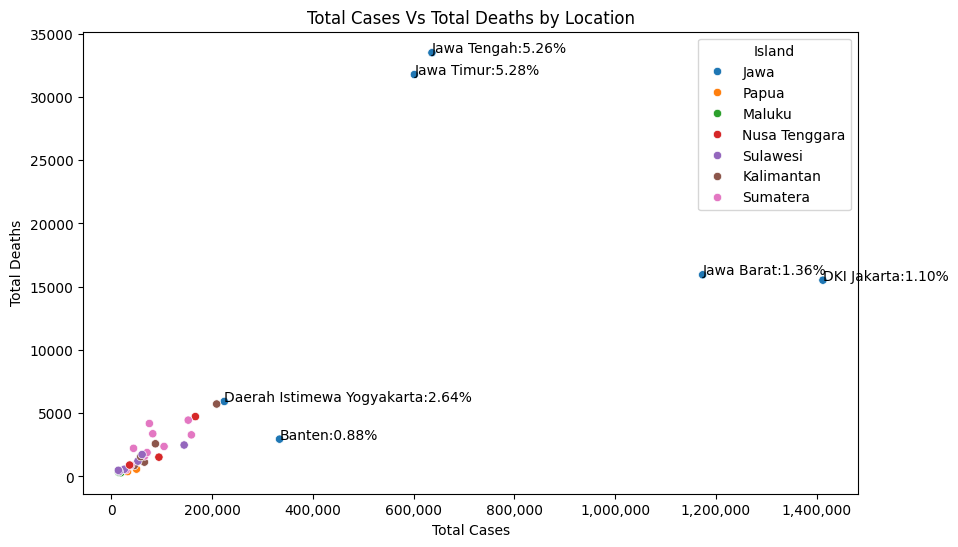

In [248]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='Total Cases', y='Total Deaths',data=latest_data, hue= 'Island')
for x in range(len(latest_data[latest_data['Island']=='Jawa'])):
    location= latest_data[latest_data['Island']=='Jawa']['Location'].iloc[x]
    proportion= latest_data[latest_data['Island']=='Jawa']['Death Proportion'].iloc[x]
    plt.text(latest_data[latest_data['Island']=='Jawa']['Total Cases'].iloc[x],
             latest_data[latest_data['Island']=='Jawa']['Total Deaths'].iloc[x],
             f"{location}:{proportion:.2%}")
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Total Cases Vs Total Deaths by Location')
plt.show()


#### Most locations show that as total confirmed cases increase, total deaths also increase, which is expected.

#### Jawa Island Highlights:
- Jawa Timur and Jawa Tengah have **fewer total cases** than DKI Jakarta and Jawa Barat but have **higher death proportions (~5%)**.
- This suggests that despite fewer infections, **a larger percentage of infected individuals died in those regions**, possibly indicating challenges like **healthcare capacity** or **resource availability**.

#### DKI Jakarta and Jawa Barat:
- These locations report high total cases (likely due to large populations and urban density), but comparatively **lower death proportions**.
- This might reflect **better healthcare infrastructure**, earlier interventions, or other mitigating factors.

In [295]:
latest_data['color'] = ['red' if x == latest_data['Death Proportion'].max() else 'green' if x==latest_data['Death Proportion'].min() else 'grey' for x in latest_data['Death Proportion']]


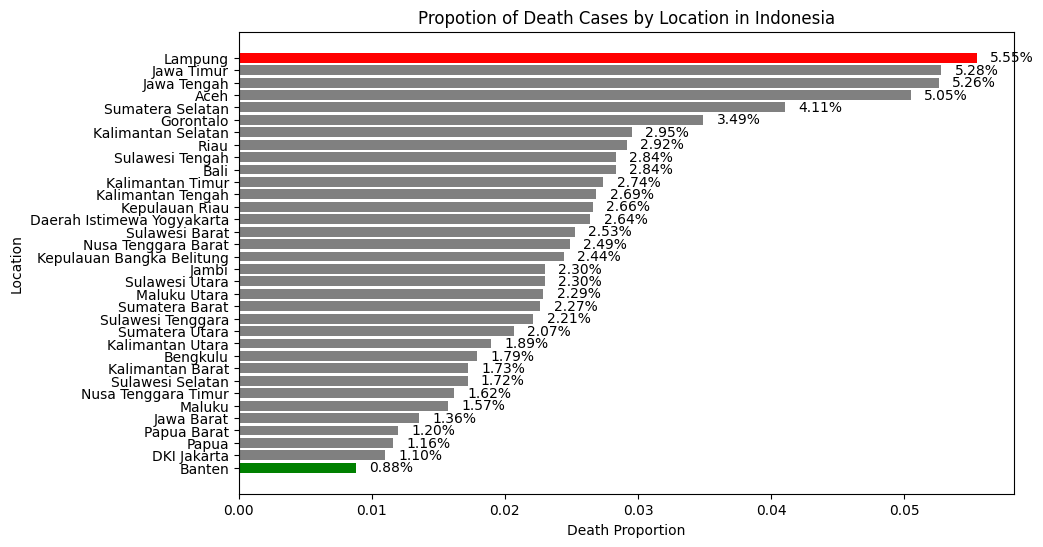

In [297]:
plt.figure(figsize= (10,6))
plt.barh(latest_data['Location'], latest_data['Death Proportion'], color=latest_data['color'])
plt.title('Propotion of Death Cases by Location in Indonesia')
plt.xlabel("Death Proportion")
plt.ylabel("Location")
for i, val in enumerate(latest_data['Death Proportion']):
    plt.text(val + 0.001, i, f'{val:.2%}', va='center')


The highest death proportion is in Lampung, where despite having a lower number of cases, the death rate is relatively high at around 5.55%. This indicates that although fewer people are infected, a significant percentage of them have died. Following Lampung, Jawa Timur and Jawa Tengah also show high death proportions, with Aceh and Sumatera Selatan reporting rates of approximately 5.05% and 4.11%, respectively. 

On the other hand, the lowest death proportions are found in DKI Jakarta (1.10%) and Banten (0.88%). Interestingly, Papua (1.1%), Papua Barat (1.16%), and Jawa Barat (1.20%) also have relatively low death proportions compared to the higher-rate regions.

### 4.5 Proportion of Total Cases by Year : Deaths, Recoveries, Active Cases

In [301]:
yearly_data= data.groupby(['year']).agg({'Total Cases':'sum',
                            'Total Deaths' : 'sum',
                            'Total Recovered' : 'sum',
                            'Total Active Cases':'sum'}).reset_index()
yearly_data ['Death'] = yearly_data['Total Deaths']/ yearly_data['Total Cases']
yearly_data ['Recover'] = yearly_data['Total Recovered']/ yearly_data['Total Cases']
yearly_data ['Active'] = yearly_data['Total Active Cases']/ yearly_data['Total Cases']

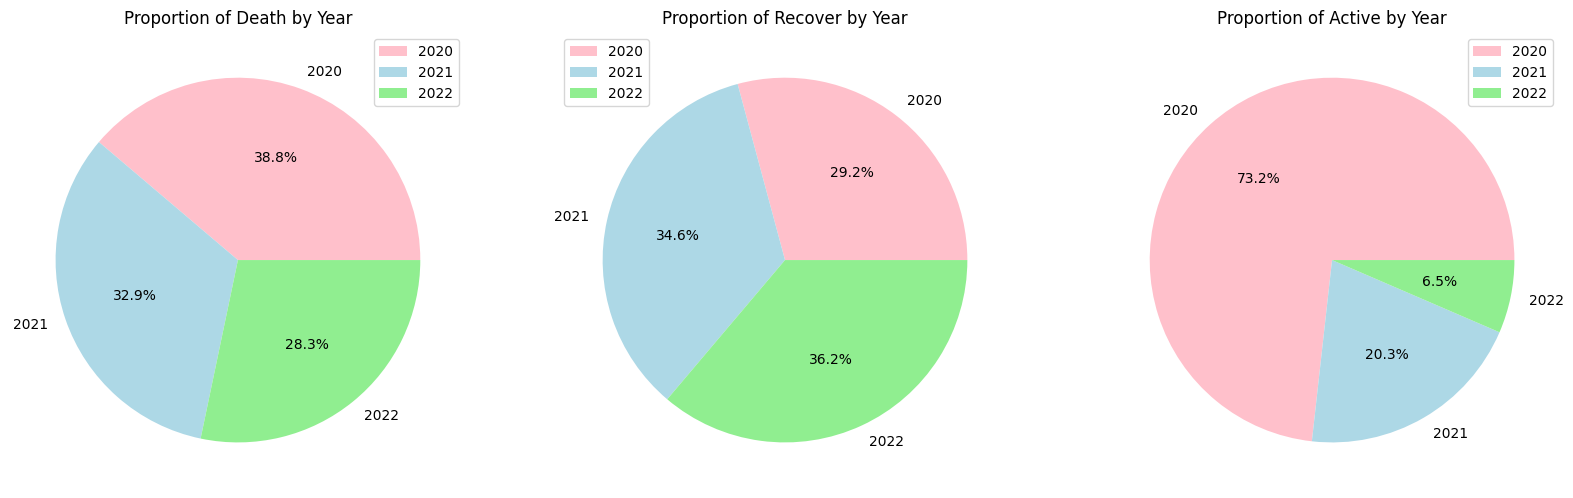

In [303]:
fig, axes= plt.subplots(1,3,figsize=(20,6))
ax= axes.flatten()
for i,x in enumerate (['Death','Recover','Active']):
    ax[i].pie(yearly_data[x], labels= yearly_data['year'], autopct= '%.1f%%', colors=['pink','lightblue','lightgreen'])
    ax[i].legend()
    ax[i].set_title(f"Proportion of {x} by Year")

# Interpretation:
# - Over the years, the proportion of deaths among total cases has decreased,
#   indicating improvements in treatment or disease management.
# - The recovery rate has increased, showing more patients are successfully recovering.
# - The proportion of active cases has decreased, suggesting fewer ongoing infections.

# Specifically, the death proportion dropped from 38.8% in 2020 to 28.3% in 2022,
# highlighting significant progress in reducing mortality.

### 

In [314]:
## Create a calendar DataFrame with all dates from the earliest to latest date in the dataset
calendar = pd.DataFrame ({'Date': pd.date_range(data['Date'].min(), data['Date'].max())})

In [316]:
# Filter data for days with new cases and new deaths (excluding zero values)
New_cases_data = data[(data['New Cases'] !=0)]
New_deaths = data[data['New Deaths'] !=0]

In [320]:
# Find dates in the calendar where no data is recorded (dates missing in original data)
calendar[(~calendar['Date'].isin(New_cases_data['Date'])) ]
# In Indonesia, between March 1, 2020, and September 16, 2022, there was at least one new COVID-19 case reported on almost every day.
# The only exceptions were 7 March 2020 where no new cases were recorded.

,Date
6,2020-03-07


In [324]:
# Identify dates where no new COVID-19 deaths were reported
calendar[(~calendar['Date'].isin(New_deaths['Date'])) ]

,Date
0,2020-03-01
1,2020-03-02
3,2020-03-04
5,2020-03-06
9,2020-03-10
875,2022-07-24
